Первая часть#
Для каждой из домашних работ предыдущего модуля:

Hw2.1.ipynb
Hw2.2.ipynb
Hw2.3.ipynb
добавьте от 3 до 5 графиков функций, разного типа на ваш выбор. Задайте графикам оформление, чтобы каждый график в своей домашней работе чем-то отличался и не был похож на другие. Можно использовать как matplotlib так и seaborn

Hw2.1.ipynb

In [11]:
import pandas as pd
import requests
from lxml import etree
import numpy as np

url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C"
r = requests.get(url)
html = etree.HTML(r.content)
data = html.xpath('/html/body/div[3]/div[3]/div[5]/div[1]/table[11]/tbody')


index = [next(i[0].itertext()) for i in data[0]]
index = index[1:]
colum = [i[1].text for i in data[0]]
#print(index)
data_dict ={}
for j in range(1, len(data[0][0])):
    a =[str(i[j].text).replace(",", ".").replace("\n", "") for i in data[0]]
    data_dict[a[0]] =a[1:]

dataframe = pd.DataFrame(data_dict, index=index)
dataframe.replace("—", np.nan, inplace=True)
dataframe.replace("None", np.nan, inplace=True)
dataframe=dataframe.apply(pd.to_numeric)
dataframe.head(5)

,1950,1960,1970,1990,2000,2012,2014,2019
Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN


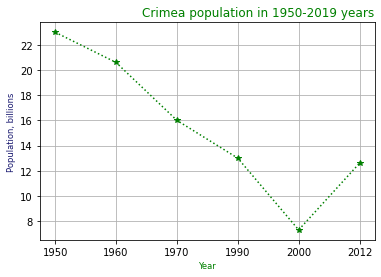

In [12]:
import matplotlib.pyplot as plt
plt.plot(dataframe.columns, dataframe.loc['Крим'], label='Crimea population', color="green", linestyle='dotted', marker="*")
plt.xlabel('Year', fontsize='small', color='green')
plt.ylabel('Population, billions', fontsize='small', color='midnightblue')
plt.title('Crimea population in 1950-2019 years', fontsize=12, loc="right", color='green')
plt.grid()

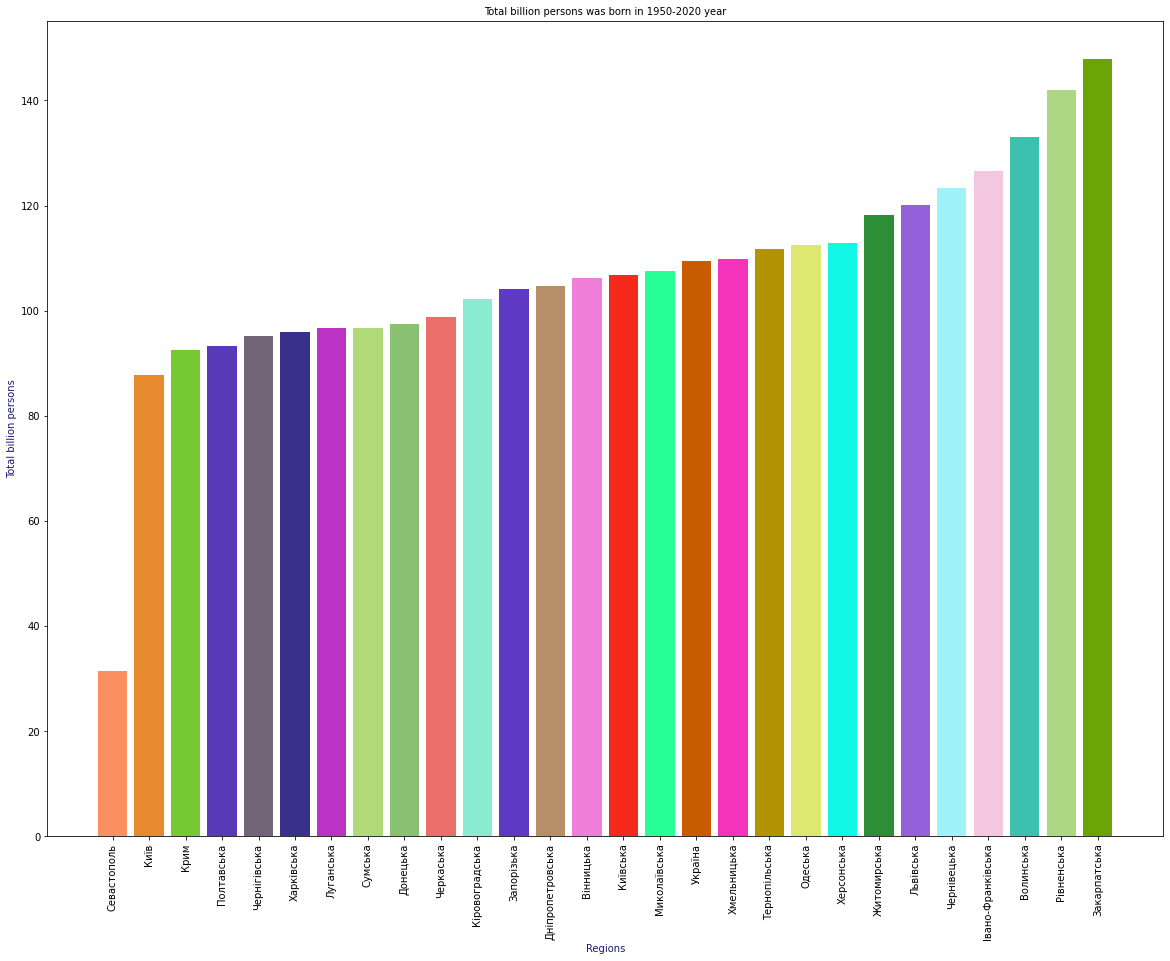

In [21]:

import random

colors=[]
r = lambda: random.randint(0,255)
for k in range(0, len(dataframe.index)):
  colors.append('#%02X%02X%02X' % (r(),r(),r()))
a= zip([dataframe.iloc[j].sum() for j in range(0, len(dataframe.index))], [i for i in dataframe.index])
b= sorted(a)

plt.bar([i[1] for i in  b], [j[0] for j in b], color=colors)
plt.rcParams["figure.figsize"] = [10, 10]
plt.xlabel("Regions", fontsize="10", color="midnightblue")
plt.ylabel("Total billion persons", fontsize="10", color="midnightblue")
plt.title("Total billion persons was born in 1950-2020 year", fontsize=10)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = [10, 15]
plt.show()

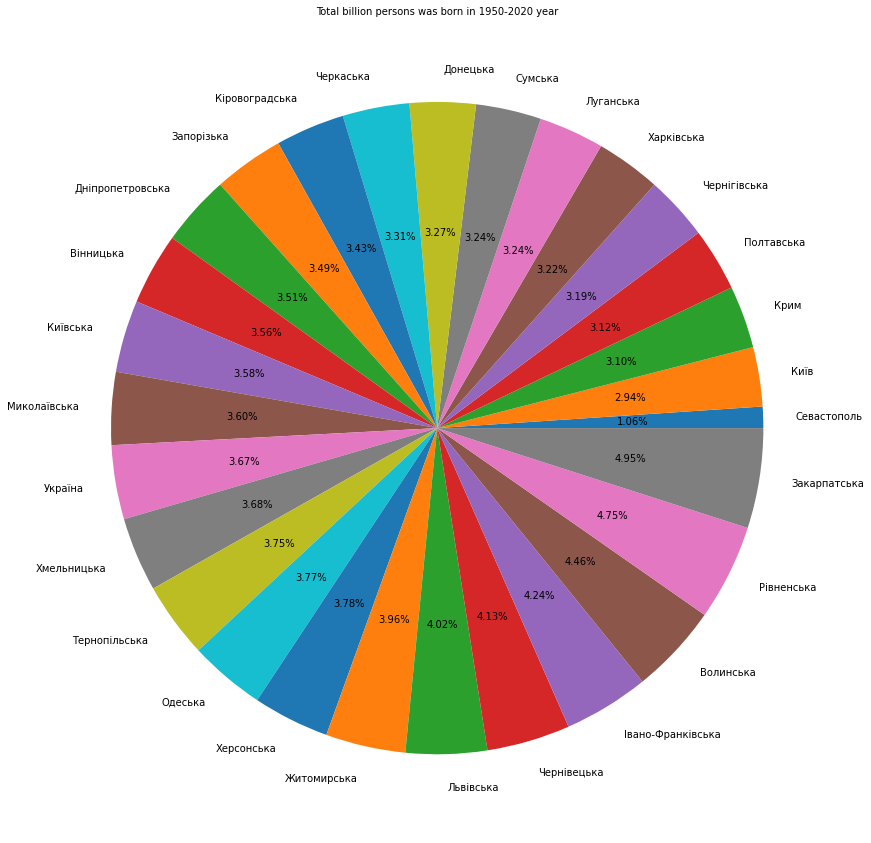

In [30]:
colors=[]

a= zip([dataframe.iloc[j].sum() for j in range(0, len(dataframe.index))], [i for i in dataframe.index])
b= sorted(a)

plt.pie([i[0] for i in  b], labels=[j[1] for j in b], autopct="%.2f%%")
plt.rcParams["figure.figsize"] = [15, 15]
plt.title("Total billion persons was born in 1950-2020 year", fontsize=10)
plt.xticks(rotation=90)
plt.show()

2.2

In [37]:
import pandas as pd
import os
link = "https://drive.google.com/file/d/1JMYqXipZpz9Y5-vyxvLEO2Y1sRBxqu-U/edit"

#"2017_jun_final.csv"
df=pd.read_csv("2017_jun_final.csv", encoding='utf8', sep=',')
df.head(3)

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,...,False,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV


In [38]:
import seaborn as sns
new_df=df.copy()
for i in df.columns:
  if i != "Язык.программирования" and df[i].isnull().sum() > 0:
    #print(df[i].isnull().sum())
    new_df=new_df.drop([f"{i}"], axis=1)
python_data=new_df[new_df["Язык.программирования"] == "Python"]  
python_data.head(1)

,N,Должность,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary
12,13,Software Engineer,Python,1,меньше 3 месяцев,800,200,Киев,до 50 человек,Аутсорсинговая,мужской,26,Высшее,False,ниже среднего,12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800


[Text(0, 0, 'Software Engineer'),
 Text(0, 0, 'Junior Software Engineer'),
 Text(0, 0, 'Senior Software Engineer'),
 Text(0, 0, 'Technical Lead'),
 Text(0, 0, 'System Architect')]

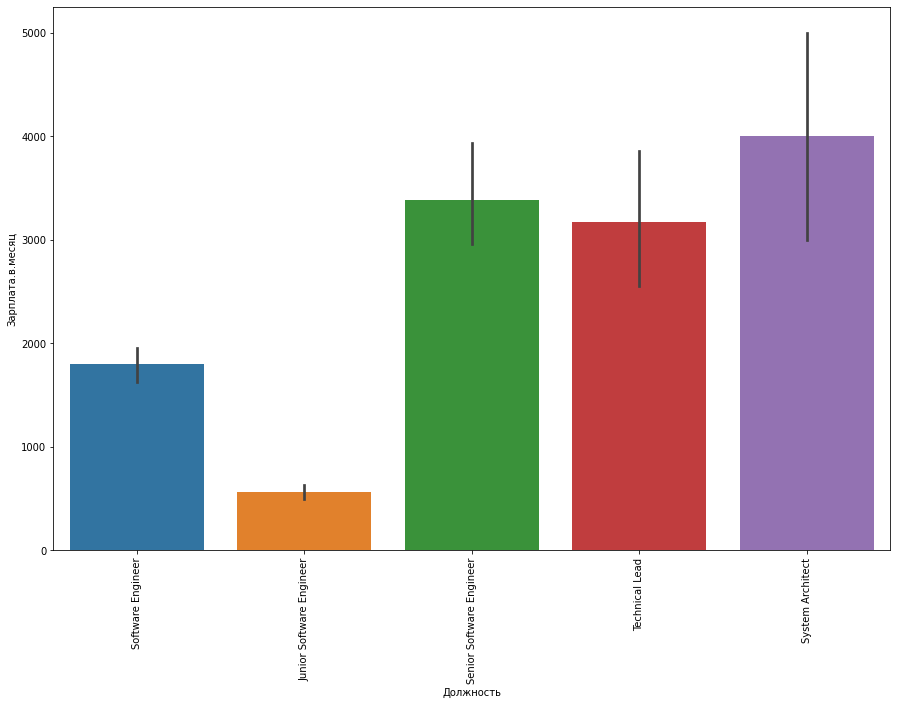

In [39]:
plt.figure(figsize = (15,10))
ax=sns.barplot(x=python_data['Должность'], y=python_data['Зарплата.в.месяц'])
sns.set_style("whitegrid", {'axes.grid': True})
#sns.set_context("poster")
sns.axes_style({'axes.grid': True, 'xtick.direction': 'in',})
ax.set_xticklabels(python_data['Должность'].unique(),rotation = 90)

[Text(0, 0, 'Software Engineer'),
 Text(0, 0, 'Senior Software Engineer'),
 Text(0, 0, 'Junior Software Engineer')]

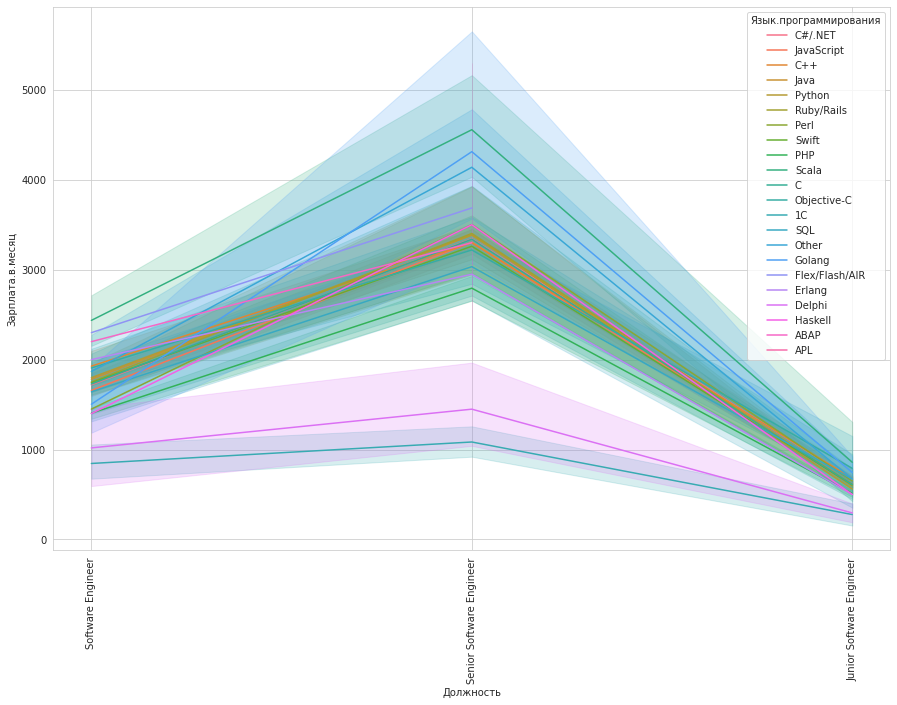

In [54]:
new_new_df=new_df[(new_df['Должность']=="Junior Software Engineer") | (new_df['Должность']=="Software Engineer") | (new_df['Должность']=="Senior Software Engineer")]
plt.figure(figsize = (15,10))
ax=sns.lineplot(x=new_new_df['Должность'], y=new_new_df['Зарплата.в.месяц'], hue=new_new_df["Язык.программирования"])
sns.set_style("whitegrid", {'axes.grid': True})
#sns.set_context("poster")
sns.axes_style({'axes.grid': True, 'xtick.direction': 'in',})
ax.set_xticklabels(labels = ["Software Engineer", "Senior Software Engineer", "Junior Software Engineer"],rotation = 90)
#plt.legend(loc='upper left')

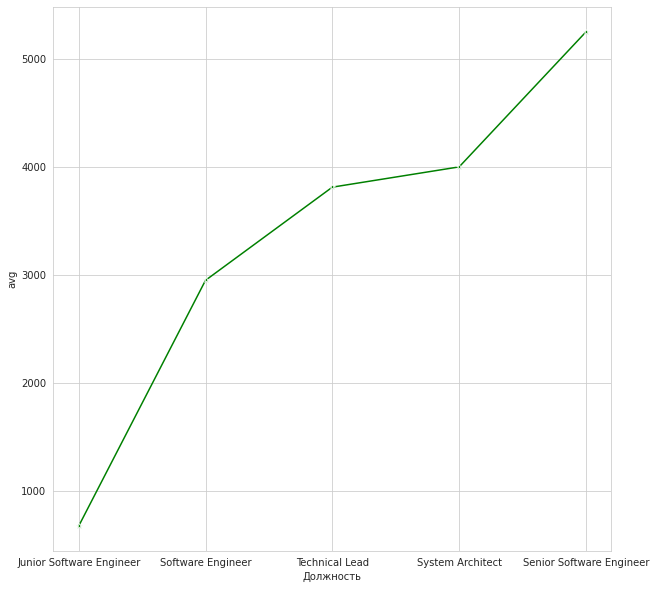

In [67]:
gk=python_data.groupby("Должность")
x = gk.agg({"Зарплата.в.месяц":["min", "max"]})
df_avg=x
def fill_avg_salary(x,y):
  return (x + y)/2

df_avg["avg"]=df_avg.apply(lambda v: fill_avg_salary(v[x.columns[0]], v[x.columns[1]]), axis=1)
df_avg
a=df_avg.sort_values("avg")
plt.figure(figsize = (10,10))
ax=sns.lineplot(x=a.index, y=a['avg'], sort=False, color="green", marker="*")


2.3

In [95]:
import os
import pandas as pd
link = "https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019"
books=pd.read_csv("bestsellers with categories.csv", encoding='utf8', sep=',')
books.head(3)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction


[Text(0, 0, 'American Psychological Association'),
 Text(0, 0, 'Gallup'),
 Text(0, 0, 'Dr. Seuss'),
 Text(0, 0, 'Rob Elliott'),
 Text(0, 0, 'Eric Carle'),
 Text(0, 0, 'Don Miguel Ruiz'),
 Text(0, 0, 'Sarah Young'),
 Text(0, 0, 'The College Board'),
 Text(0, 0, 'Suzanne Collins'),
 Text(0, 0, 'Dale Carnegie'),
 Text(0, 0, 'R. J. Palacio'),
 Text(0, 0, 'Patrick Lencioni'),
 Text(0, 0, 'Gary Chapman'),
 Text(0, 0, 'Gary Chapman'),
 Text(0, 0, 'Roger Priddy')]

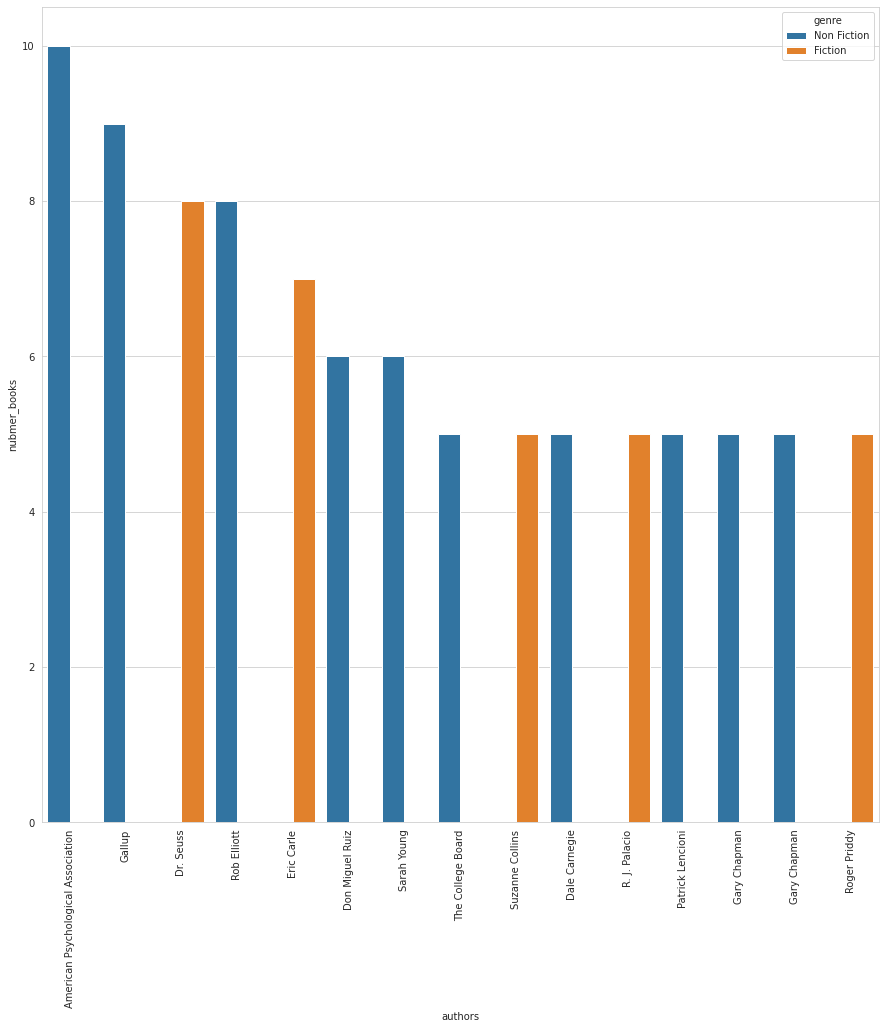

In [204]:
books.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
books_new=books.groupby(["author", "genre", 'price']).agg({"author":["count"]})
books_new.columns = books_new.columns.droplevel()
books_new=books_new.sort_values("count", ascending=False)
books_new.T.columns = books_new.T.columns.droplevel()
#print(books_new.shape)
#books_new=books_new.T
#plt.figure(figsize = (15,10))
#ax=sns.lineplot(x=books_new["Name"][0], y=books_new['count'], hue=books_new["name"][1])
#sns.set_style("whitegrid", {'axes.grid': True})
#sns.set_context("poster")
#sns.axes_style({'axes.grid': True, 'xtick.direction': 'in',})
#ax.set_xticklabels(labels = ["Software Engineer", "Senior Software Engineer", "Junior Software Engineer"],rotation = 90)

authors=[]
genre  = []
nubmer_books =[]
price=[]
dict={}

for i in range(0, books_new.shape[0]):  
  authors.append(books_new.T.columns[i][0])
  genre.append(books_new.T.columns[i][1])
  price.append(books_new.T.columns[i][2])
  nubmer_books.append(books_new["count"][i])

fiction=0
non_fiction=0

for j, k in enumerate(genre):
  if k == "Fiction":
    fiction+= int(nubmer_books[j])
  else:non_fiction+= int(nubmer_books[j])


dict={"authors":authors, "genre":genre, "nubmer_books":nubmer_books, "price":price}
dataframe = pd.DataFrame(dict)
#dataframe.head()
ax=sns.barplot(x=dataframe["authors"][:16], y=dataframe['nubmer_books'][:16], hue=dataframe["genre"][:16])
ax.set_xticklabels(labels = dataframe["authors"],rotation = 90)

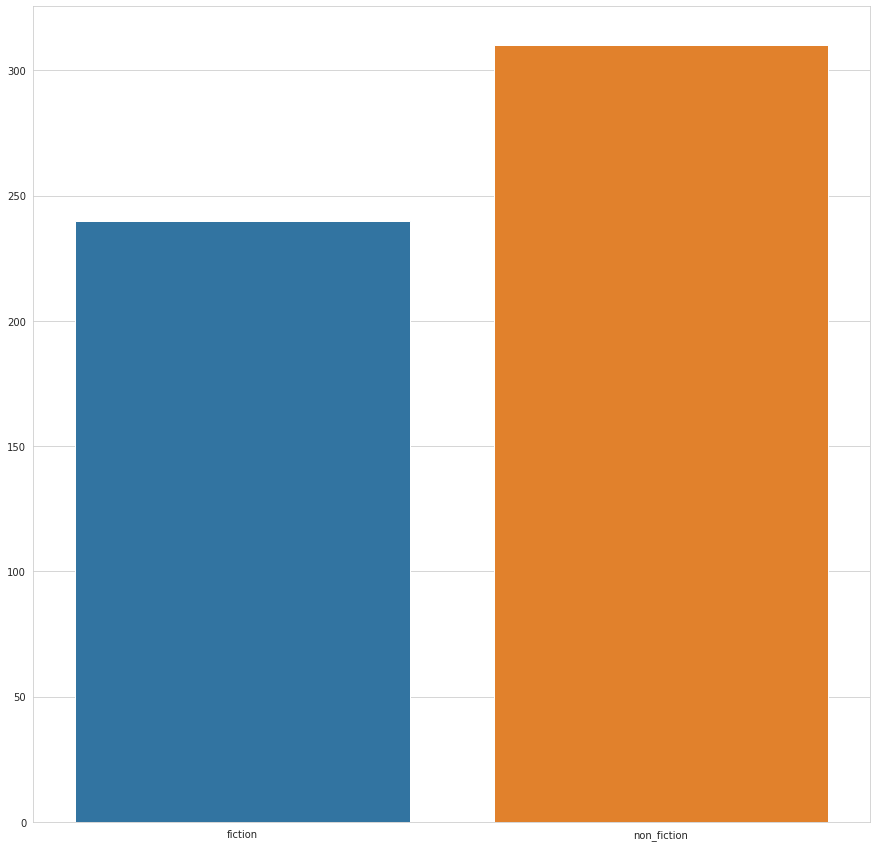

In [202]:
ax=sns.barplot(x=["fiction", "non_fiction"], y=[fiction, non_fiction])
#ax.set_xticklabels(labels = dataframe["authors"],rotation = 90)

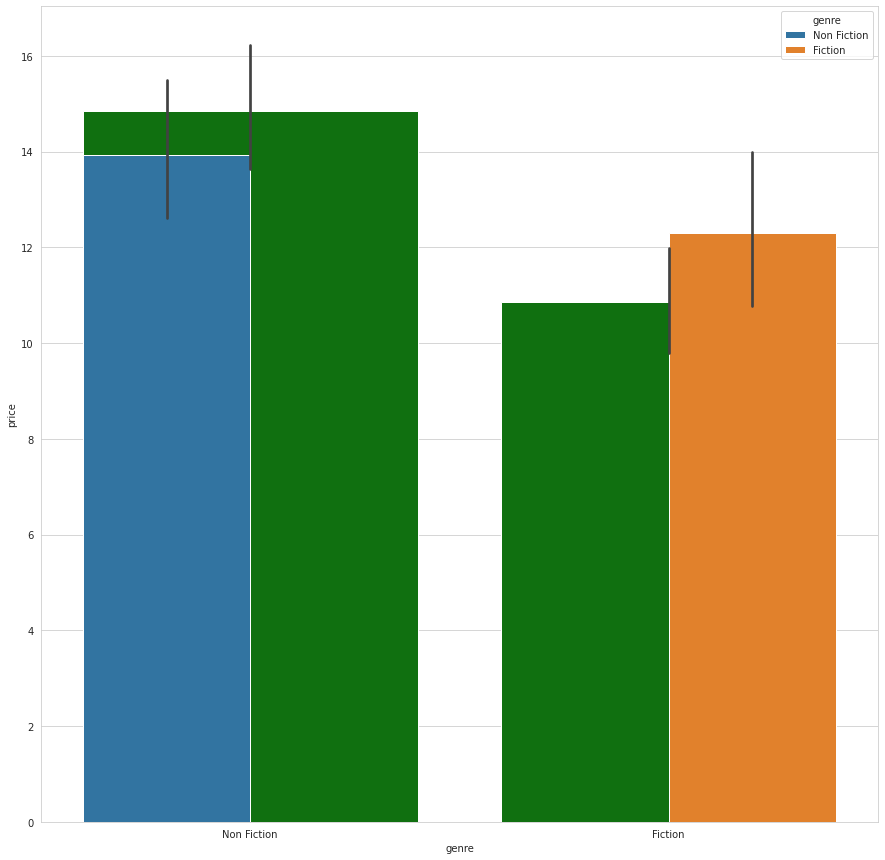

In [225]:
ax=sns.barplot(x=books["genre"], y=books["price"], color="green")
bx=sns.barplot(x=dataframe["genre"], y=dataframe['price'], hue=dataframe["genre"])
#books["genre"]
# Почему получаются разные результаты?